In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
class AZmet:
    def __init__ (self, filename):
        file = pd.read_csv(filename, names = ["Year", "Day", "Hour", 
                                            "Air Temperature", "Relative Humidity", 
                                            "VPD", "Solar Radiation", "Precipitation", 
                                            "4 inch Soil T", "12 inch Soil T", 
                                            "Avg Wind Speed", "Wind Vector Magnitude", 
                                            "Wind Vector Direction", "Wind Direction STDEV", 
                                            "Max Wind Speed", "Reference Evapotranspiration", 
                                            "Actual Vapor Pressure", "Dewpoint"])
        file_df = pd.DataFrame(file)
        file_df['combined'] = file_df["Year"]*1000 + file_df["Day"]
        file_df["date"] = pd.to_datetime(file_df["combined"], format = "%Y%j")
        data = file_df.set_index('date')
        del data['combined']
        self.__data__ = data
        
    def specific_time(self, date1, date2):
        data = self.__data__
        data = data[['Year', 'Day', 'Air Temperature', '4 inch Soil T']]
        specific_time_start = data[data.index >= date1]
        specific_time_end = specific_time_start[specific_time_start.index <= date2]
        return specific_time_end
    
filename = AZmet('/Users/sebastiancalleja/Desktop/AZmet Data/2020_azmet_data.txt')

In [4]:
azmet_2020 = AZmet.specific_time(filename, '2020-03-01', '2020-05-31')
azmet_2020.reset_index()

,date,Year,Day,Air Temperature,4 inch Soil T
0,2020-03-01,2020,61,12.5,15.9
1,2020-03-01,2020,61,12.8,15.4
2,2020-03-01,2020,61,11.2,15.1
3,2020-03-01,2020,61,9.9,14.7
4,2020-03-01,2020,61,10.7,14.4
...,...,...,...,...,...
2203,2020-05-31,2020,152,36.0,34.5
2204,2020-05-31,2020,152,34.5,33.4
2205,2020-05-31,2020,152,32.9,32.5
2206,2020-05-31,2020,152,29.7,31.7


In [5]:
azmet_2020.to_csv('AZmet_Daily_2020.csv')

In [6]:
data_2020 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2020.csv')
data_2019 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2019.csv')
data_2018 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2018.csv')
data_2017 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2017.csv')
data_2016 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2016.csv')
data_2015 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/AZmet_Daily_2015.csv')

In [7]:
avg_data_2020 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2020.csv')
avg_data_2019 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2019.csv')
avg_data_2018 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2018.csv')
avg_data_2017 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2017.csv')
avg_data_2016 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2016.csv')
avg_data_2015 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2015.csv')

In [8]:
dates = [data_2020, data_2019, data_2018, data_2017, data_2016, data_2015]
All_dates = pd.concat(dates)
del All_dates['Day']

In [9]:
avg_dates = [avg_data_2020, avg_data_2019, avg_data_2018, avg_data_2017, avg_data_2016, avg_data_2015]
avg_All_dates = pd.concat(avg_dates)
del avg_All_dates['Day']

In [10]:
All_dates['date'] = pd.to_datetime(All_dates['date'])
All_dates['month'] = All_dates.date.dt.month
All_dates['day'] = All_dates.date.dt.day

In [11]:
avg_All_dates['date'] = pd.to_datetime(avg_All_dates['date'])
avg_All_dates['month'] = avg_All_dates.date.dt.month
avg_All_dates['day'] = avg_All_dates.date.dt.day

In [12]:
max_by_day = All_dates.groupby(["month", "day"], axis = 0, as_index = True).max()
min_by_day = All_dates.groupby(["month", "day"], axis = 0, as_index = True).min()

In [13]:
mean_by_day = avg_All_dates.groupby(["month", "day"], axis = 0, as_index = True).mean()

In [14]:
mean_by_day['Min Air Temperature'] = min_by_day['Air Temperature']
mean_by_day['Max Air Temperature'] = max_by_day['Air Temperature']
mean_by_day['Min 4 inch Soil T'] = min_by_day['4 inch Soil T']
mean_by_day['Max 4 inch Soil T'] = max_by_day['4 inch Soil T']
mean_by_day['date'] = min_by_day['date']

In [15]:
data_5year = mean_by_day.rename(columns = {'Air Temperature': 'Avg Air Temperature', '4 inch Soil T':'Avg 4 inch Soil T'})

In [16]:
data_year = data_5year.reset_index()

In [17]:
data_year

,month,day,Year,Avg Air Temperature,Avg 4 inch Soil T,Min Air Temperature,Max Air Temperature,Min 4 inch Soil T,Max 4 inch Soil T,date
0,3,1,2017.5,15.177083,16.071528,0.5,30.4,9.1,21.9,2015-03-01
1,3,2,2017.5,14.904167,15.515972,1.0,30.9,9.8,20.3,2015-03-02
2,3,3,2017.5,15.439583,15.490972,2.2,30.9,10.8,22.2,2015-03-03
3,3,4,2017.5,15.364583,16.325000,5.2,30.6,10.8,22.7,2015-03-04
4,3,5,2017.5,15.675694,16.470833,1.8,27.8,10.8,23.0,2015-03-05
...,...,...,...,...,...,...,...,...,...,...
87,5,27,2017.5,25.775000,26.395139,15.7,40.9,19.0,35.8,2015-05-27
88,5,28,2017.5,27.536806,26.982639,11.9,41.9,19.6,36.3,2015-05-28
89,5,29,2017.5,28.982639,27.122222,14.1,43.3,20.7,34.5,2015-05-29
90,5,30,2017.5,29.315278,27.845833,15.1,42.5,21.4,34.7,2015-05-30


In [18]:
def c_to_f (air, max_air, min_air, soil, max_soil, min_soil):
    data_year['Avg Air Temperature F'] = pd.DataFrame((air*(9/5)) + 32)
    data_year['Max Air Temperature F'] = pd.DataFrame((max_air*(9/5)) + 32)
    data_year['Min Air Temperature F'] = pd.DataFrame((min_air*(9/5)) + 32)
    data_year['Avg 4 inch Soil T F'] = pd.DataFrame((soil*(9/5)) + 32)
    data_year['Max 4 inch Soil T F'] = pd.DataFrame((max_soil*(9/5)) + 32)
    data_year['Min 4 inch Soil T F'] = pd.DataFrame((min_soil*(9/5)) + 32)
    return data_year

In [19]:
data_year_f = c_to_f(data_year['Avg Air Temperature'], data_year['Max Air Temperature'], data_year['Min Air Temperature'], 
       data_year['Avg 4 inch Soil T'], data_year['Max 4 inch Soil T'], data_year['Min 4 inch Soil T'])

In [20]:
data_year_f

,month,day,Year,Avg Air Temperature,Avg 4 inch Soil T,Min Air Temperature,Max Air Temperature,Min 4 inch Soil T,Max 4 inch Soil T,date,Avg Air Temperature F,Max Air Temperature F,Min Air Temperature F,Avg 4 inch Soil T F,Max 4 inch Soil T F,Min 4 inch Soil T F
0,3,1,2017.5,15.177083,16.071528,0.5,30.4,9.1,21.9,2015-03-01,59.31875,86.72,32.90,60.92875,71.42,48.38
1,3,2,2017.5,14.904167,15.515972,1.0,30.9,9.8,20.3,2015-03-02,58.82750,87.62,33.80,59.92875,68.54,49.64
2,3,3,2017.5,15.439583,15.490972,2.2,30.9,10.8,22.2,2015-03-03,59.79125,87.62,35.96,59.88375,71.96,51.44
3,3,4,2017.5,15.364583,16.325000,5.2,30.6,10.8,22.7,2015-03-04,59.65625,87.08,41.36,61.38500,72.86,51.44
4,3,5,2017.5,15.675694,16.470833,1.8,27.8,10.8,23.0,2015-03-05,60.21625,82.04,35.24,61.64750,73.40,51.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5,27,2017.5,25.775000,26.395139,15.7,40.9,19.0,35.8,2015-05-27,78.39500,105.62,60.26,79.51125,96.44,66.20
88,5,28,2017.5,27.536806,26.982639,11.9,41.9,19.6,36.3,2015-05-28,81.56625,107.42,53.42,80.56875,97.34,67.28
89,5,29,2017.5,28.982639,27.122222,14.1,43.3,20.7,34.5,2015-05-29,84.16875,109.94,57.38,80.82000,94.10,69.26
90,5,30,2017.5,29.315278,27.845833,15.1,42.5,21.4,34.7,2015-05-30,84.76750,108.50,59.18,82.12250,94.46,70.52


In [21]:
avg_temp = data_year_f['Avg Air Temperature F']
max_temp = data_year_f['Max Air Temperature F']
min_temp = data_year_f['Min Air Temperature F']
avg_soil = data_year_f['Avg 4 inch Soil T F']
max_soil = data_year_f['Max 4 inch Soil T F']
min_soil = data_year_f['Min 4 inch Soil T F']
date = data_year['date']

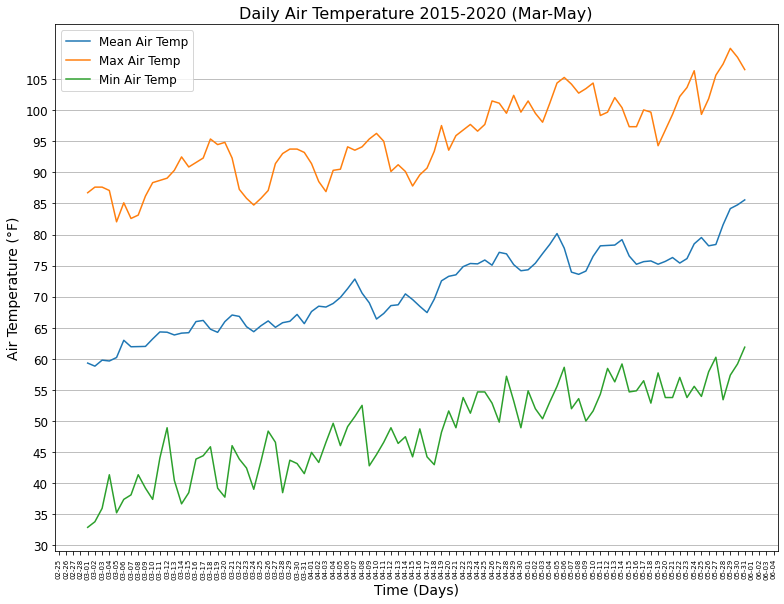

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
ax.plot(date, avg_temp, label = 'Mean Air Temp')
ax.plot(date, max_temp, label = 'Max Air Temp')
ax.plot(date, min_temp, label = 'Min Air Temp')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=90)
plt.yticks(np.arange(30, max(max_temp), 5))
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Air Temperature (°F)", fontsize=14)
plt.title("Daily Air Temperature 2015-2020 (Mar-May)", fontsize=16)
ax.legend(loc = 'best', ncol= 1, fontsize=12)
ax.yaxis.grid()
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=7)
fig.set_size_inches(11.0,8.5)
plt.tight_layout()
plt.savefig("Daily Air Temperature 2015-2020 (Mar-May).pdf", dpi = 1000)

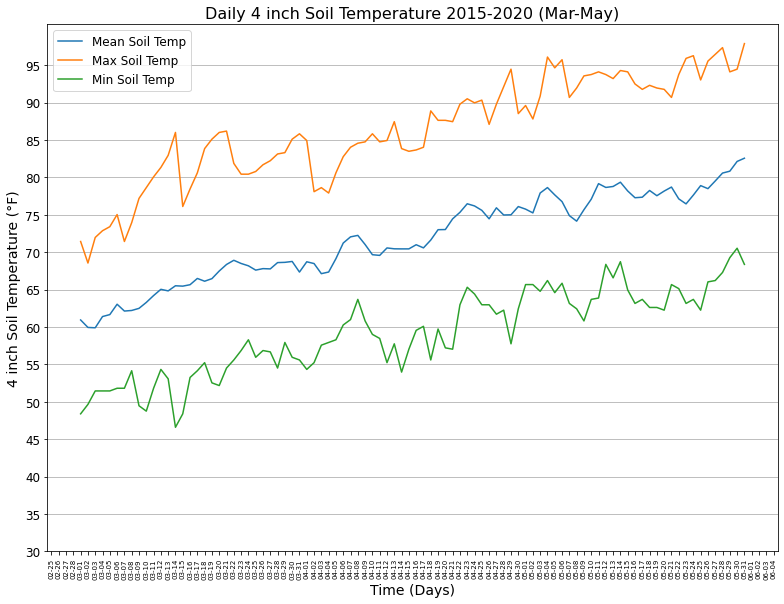

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
ax.plot(date, avg_soil, label = 'Mean Soil Temp')
ax.plot(date, max_soil, label = 'Max Soil Temp')
ax.plot(date, min_soil, label = 'Min Soil Temp')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=90)
plt.yticks(np.arange(30, max(max_soil), 5))
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("4 inch Soil Temperature (°F)", fontsize=14)
plt.title("Daily 4 inch Soil Temperature 2015-2020 (Mar-May)", fontsize=16)
ax.legend(loc = 'best', ncol= 1, fontsize=12)
ax.yaxis.grid()
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=7)
fig.set_size_inches(11.0,8.5)
plt.tight_layout()
plt.savefig("Daily 4 inch Soil Temperature 2015-2020 (Mar-May).pdf", dpi = 1000)